In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/spine'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/spine/331/Normal/N4,N,M,6_1_0.jpg
/spine/331/Normal/N39,N,M,5_1_2.jpg
/spine/331/Normal/N23,N,F,29_1_0.jpg
/spine/331/Normal/N67,N,5,M_1_0.jpg
/spine/331/Normal/N40,N,F,25_1_0.jpg
/spine/331/Normal/N33,N,F,20_1_0.jpg
/spine/331/Normal/N27,N,F,22_1_0.jpg
/spine/331/Normal/N3,N,M,22_1_0.jpg
/spine/331/Normal/N43,N,F,24_1_0.jpg
/spine/331/Normal/N5,N,F,31_1_0.jpg
/spine/331/Normal/N59,N,34M,F_1_0.jpg
/spine/331/Normal/N1,N,F,21_1_0.jpg
/spine/331/Normal/N38,N,F,11_1_0.jpg
/spine/331/Normal/N53,N,36,F_1_0.jpg
/spine/331/Normal/N56,N,22,F_1_0.jpg
/spine/331/Normal/N46,N,M,22_1_0.jpg
/spine/331/Normal/N67,N,21,F_1_0.jpg
/spine/331/Normal/N30,N,M,6_1_0.jpg
/spine/331/Normal/N2,N,F,17_1_0.jpg
/spine/331/Normal/N12,N,F,14_1_0.jpg
/spine/331/Normal/N16,N,M,17_1_0.jpg
/spine/331/Normal/N58,N,43,M_1_0.jpg
/spine/331/Normal/N35,N,F,5_1_0.jpg
/spine/331/Normal/N11,N,F,26_1_0.jpg
/spine/331/Normal/N52,N,47,F_1_0.jpg
/spine/331/Normal/N55,N,33,F_1_0.jpg
/spine/331/Normal/N57,N,22,F_1_2.jpg
/spine/331

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

base_path = '/spine/331'

In [ ]:
classes = ['Normal', 'Scol', 'Spond']
image_counts = {}

for class_name in classes:
    folder_path = os.path.join(base_path, class_name)
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    image_counts[class_name] = len(image_files)

df_counts = pd.DataFrame(list(image_counts.items()), columns=['Class', 'ImageCount'])

In [ ]:
df_counts

,Class,ImageCount
0,Normal,71
1,Scol,185
2,Spond,78


In [ ]:
import seaborn as sns

<ipython-input-9-9c570a32c822>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_counts, x='Class', y='ImageCount', palette="viridis")


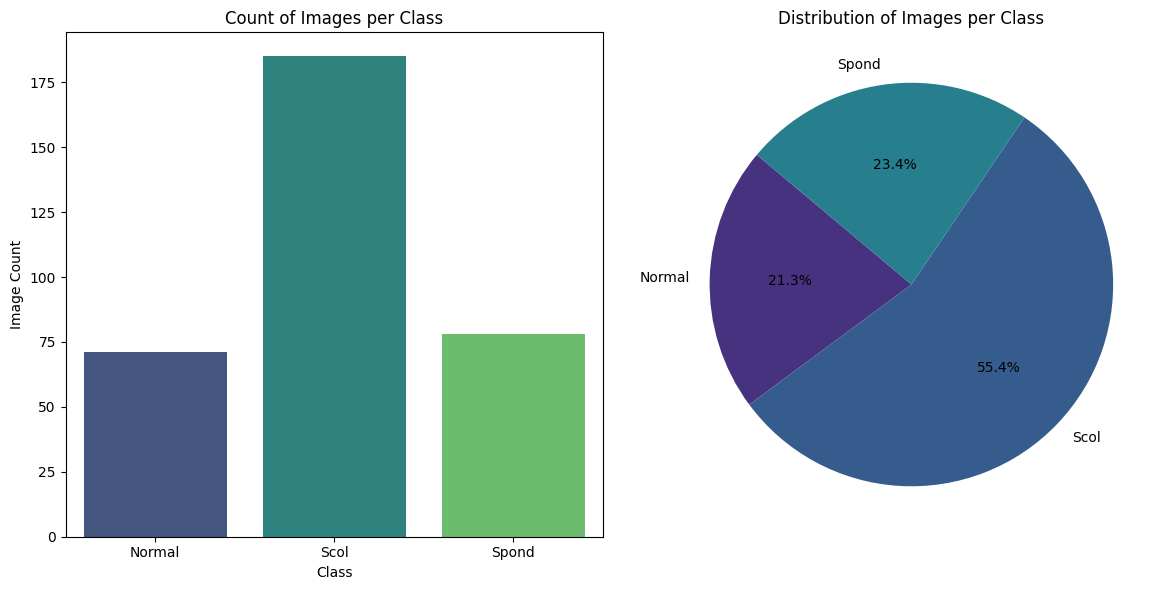

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=df_counts, x='Class', y='ImageCount', palette="viridis")
plt.title('Count of Images per Class')
plt.ylabel('Image Count')
plt.xlabel('Class')

plt.subplot(1, 2, 2)
plt.pie(df_counts['ImageCount'], labels=df_counts['Class'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title('Distribution of Images per Class')

plt.tight_layout()
plt.show()

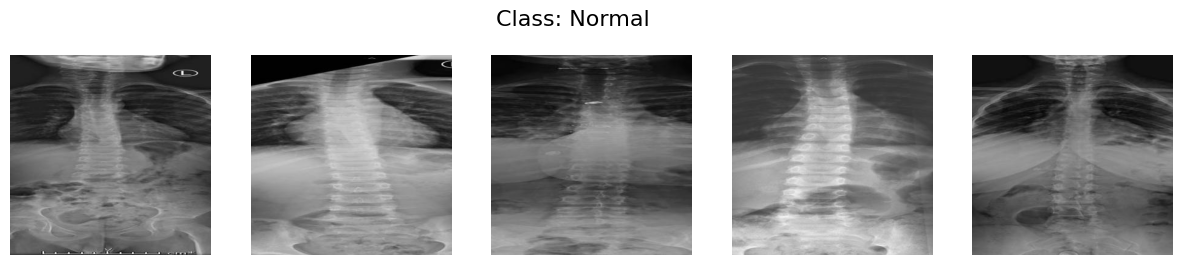

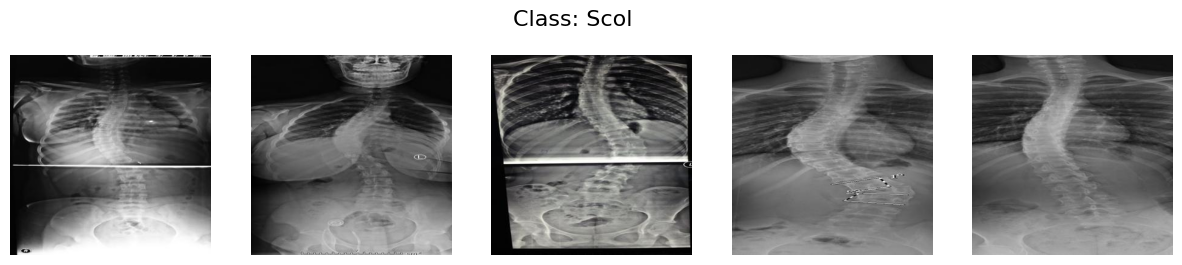

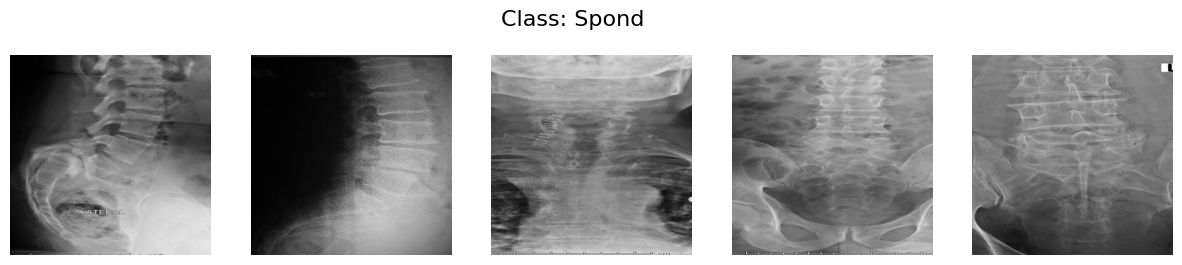

In [ ]:
for class_name in classes:
    folder_path = os.path.join(base_path, class_name)
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))][:5]  # Get first 5 images

    plt.figure(figsize=(15, 3))
    plt.suptitle(f"Class: {class_name}", fontsize=16)

    for i, image_file in enumerate(image_files):
        image_path = os.path.join(folder_path, image_file)
        image = Image.open(image_path)

        plt.subplot(1, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')

    plt.show()

In [ ]:
dataset_path = base_path

In [ ]:
import os
import pandas as pd

dataset_path = '/spine/331'
folders = {'Normal': 1,'Scol':2,'Spond': 3}

image_data = []

for folder_name, label in folders.items():
    folder_path = os.path.join(dataset_path, folder_name)

    if os.path.exists(folder_path):
        image_files = os.listdir(folder_path)

        for image_file in image_files:
            image_data.append((os.path.join(folder_path, image_file), label))
    else:
        print(f"Folder {folder_path} not found.")

df = pd.DataFrame(image_data, columns=['image_path', 'label'])


In [ ]:
df.head()

,image_path,label
0,"/spine/331/Normal/N4,N,M,6_1_0.jpg",1
1,"/spine/331/Normal/N39,N,M,5_1_2.jpg",1
2,"/spine/331/Normal/N23,N,F,29_1_0.jpg",1
3,"/spine/331/Normal/N67,N,5,M_1_0.jpg",1
4,"/spine/331/Normal/N40,N,F,25_1_0.jpg",1


In [ ]:
df.tail()

,image_path,label
333,"/spine/331/Spond/N16,S,59,F_1_3.jpg",3
334,"/spine/331/Spond/N28, Olisthesis L4-5, M, 42 Y...",3
335,"/spine/331/Spond/N6,S,49,F_1001_0.jpg",3
336,"/spine/331/Spond/N30, Olisthesis L3-4 and L4-5...",3
337,"/spine/331/Spond/N31, Olisthesis L5-S1, F, 44 ...",3


In [ ]:
df.shape

(338, 2)

In [ ]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
image_path,0
label,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  338 non-null    object
 1   label       338 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


In [ ]:
df['label'].unique()

array([1, 2, 3])

In [ ]:
df['label'].value_counts()

,count
label,
2,188
3,79
1,71


In [ ]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [ ]:
df['label'] = df['label'].astype(str)

In [ ]:
train_df_new, temp_df_new = train_test_split(
    df,
    train_size=0.8,
    shuffle=True,
    random_state=42,
    stratify=df['label']
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['label']
)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

X = train_df_new['image_path'].values.reshape(-1, 1)
y = train_df_new['label'].values

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

balanced_train_df = pd.DataFrame({
    'image_path': X_resampled.flatten(),
    'label': y_resampled
})

print("Class distribution after oversampling:")
print(balanced_train_df['label'].value_counts())

Class distribution after oversampling:
label
3    150
2    150
1    150
Name: count, dtype: int64


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    balanced_train_df,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
     class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
     valid_df_new,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

Found 450 validated image filenames belonging to 3 classes.
Found 34 validated image filenames belonging to 3 classes.
Found 34 validated image filenames belonging to 3 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using CPU


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_xception_model(input_shape):

    inputs = Input(shape=input_shape)

    base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    height, width, channels = 7, 7, 2048
    x = Reshape((height * width, channels))(x)

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)

    attention_output = Reshape((height, width, channels))(attention_output)

    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(3, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(3, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 729s 24s/step - accuracy: 0.7116 - loss: 0.7986 - val_accuracy: 0.9412 - val_loss: 0.3092
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 715s 25s/step - accuracy: 0.9227 - loss: 0.2519 - val_accuracy: 0.4412 - val_loss: 1.3644
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 709s 24s/step - accuracy: 0.9439 - loss: 0.1280 - val_accuracy: 0.4412 - val_loss: 1.5850
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 741s 26s/step - accuracy: 0.9728 - loss: 0.0794 - val_accuracy: 0.6471 - val_loss: 0.8860
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 709s 24s/step - accuracy: 0.9812 - loss: 0.0501 - val_accuracy: 0.8529 - val_loss: 0.2911


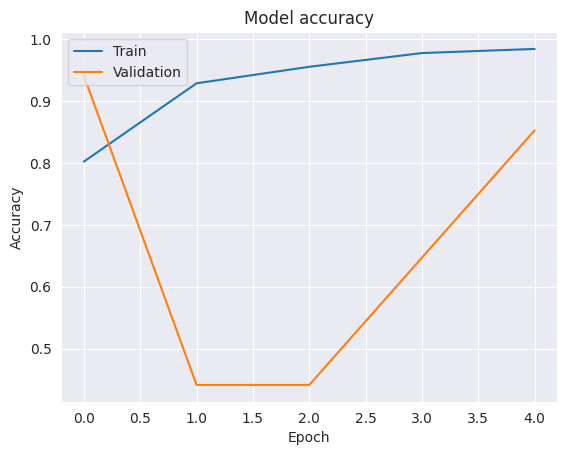

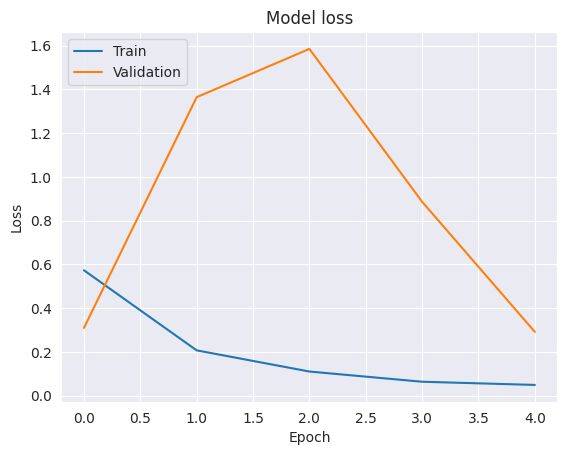

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 6s/step


In [ ]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           1       0.88      1.00      0.93         7
           2       0.95      1.00      0.97        19
           3       1.00      0.75      0.86         8

    accuracy                           0.94        34
   macro avg       0.94      0.92      0.92        34
weighted avg       0.95      0.94      0.94        34



In [ ]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

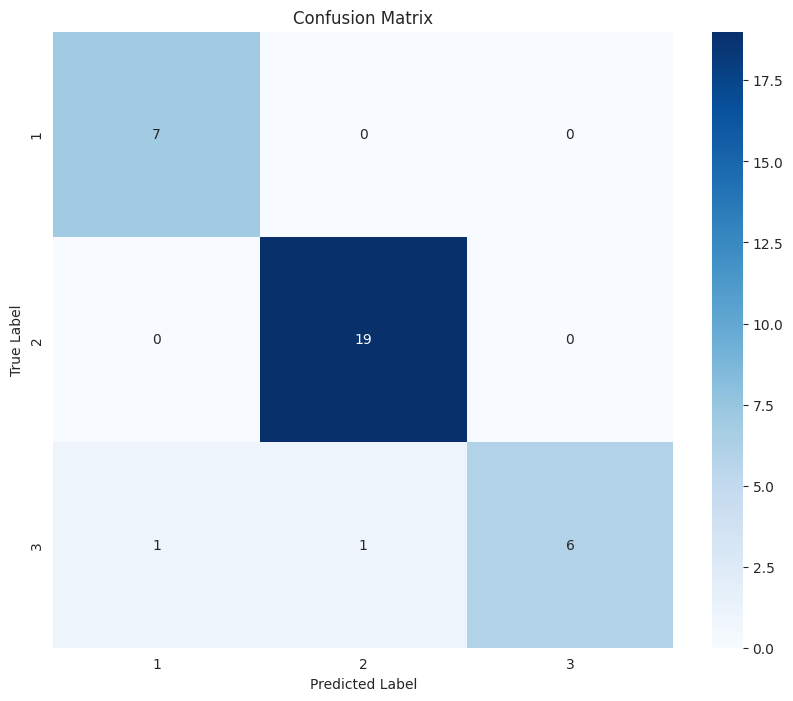

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_densenet_model(input_shape):

    inputs = Input(shape=input_shape)

    base_model = DenseNet121(weights='imagenet', input_tensor=inputs, include_top=False)
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = x.shape[1], x.shape[2], x.shape[3]
    x = Reshape((height * width, channels))(x)

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)

    attention_output = Reshape((height, width, channels))(attention_output)

    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(3, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model
input_shape = (224, 224, 3)
densenet_model = create_densenet_model(input_shape)

densenet_model.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
history = densenet_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 268s 9s/step - accuracy: 0.7958 - loss: 0.4944 - val_accuracy: 0.7941 - val_loss: 0.4900
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 247s 9s/step - accuracy: 0.9648 - loss: 0.0943 - val_accuracy: 0.8529 - val_loss: 0.3662
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 240s 8s/step - accuracy: 0.9413 - loss: 0.1834 - val_accuracy: 0.9412 - val_loss: 0.2645
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 237s 8s/step - accuracy: 0.9825 - loss: 0.0511 - val_accuracy: 0.8824 - val_loss: 0.3103
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 236s 8s/step - accuracy: 0.9772 - loss: 0.1154 - val_accuracy: 0.8529 - val_loss: 0.4998


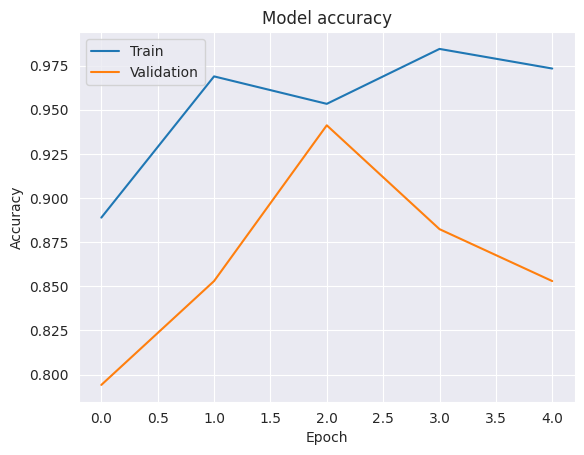

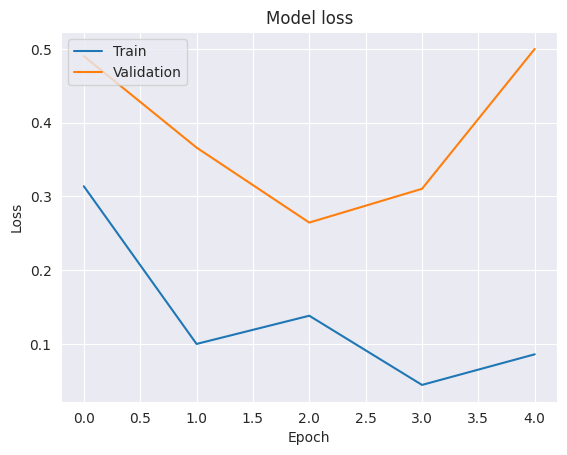

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_labels = test_gen_new.classes
predictions = densenet_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step


In [ ]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           1       0.64      1.00      0.78         7
           2       0.94      0.79      0.86        19
           3       0.86      0.75      0.80         8

    accuracy                           0.82        34
   macro avg       0.81      0.85      0.81        34
weighted avg       0.86      0.82      0.83        34



In [ ]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

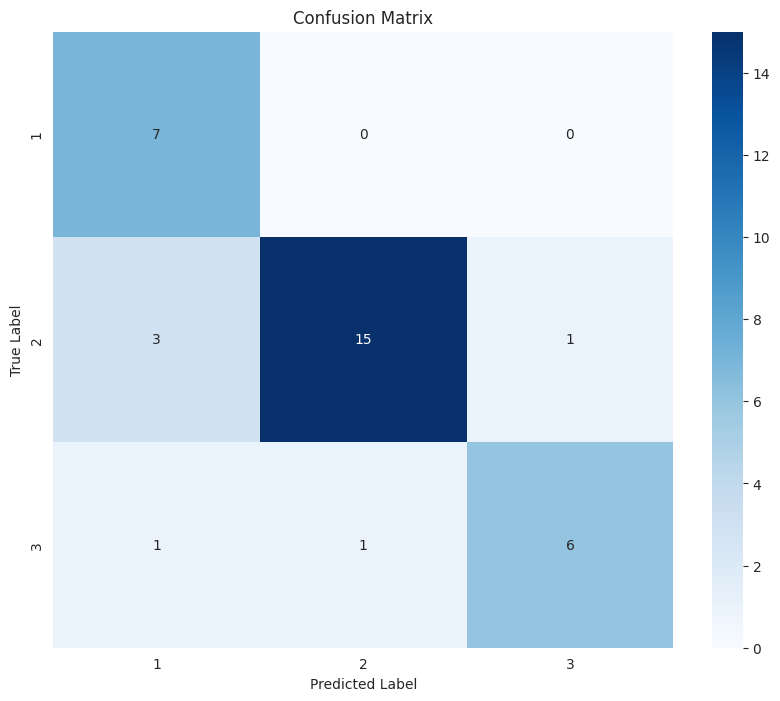

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
image_path_new = '/spine/331/Spond/N1, Olisthesis L5-S1, F, 34 yrs.jpg'

img_size = (224, 224)
img = load_img(image_path_new, target_size=img_size)
img_array = img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [ ]:
predictions = densenet_model.predict(img_array)

predicted_class = np.argmax(predictions, axis=-1)
print(f"Predicted Class: {predicted_class[0]}")

class_indices = train_gen_new.class_indices
class_labels = {v: k for k, v in class_indices.items()}
print(f"Predicted Label: {class_labels[predicted_class[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
Predicted Class: 2
Predicted Label: 3
